# **CS357000 Introduction to Multimedia - HW2**

In this homework:  

You need to design and apply different FIR filters in to separate three audio signals from the given audio file (HW2_Mix.wav).  

Next, you are asked to reduce the sampling rates of filtered signals.  

Finally, since the output audio signals are too simple, so you should apply one-fold echo and multiple-fold echo (slide #65) to produce more complex music.  

Here's the steps:
1. Transform the input signal into frequency domain and plot the spectrum (magnitude in spectrum should be normalized to [0, 1]).
2. Implement 3 different FIR filters to separate the three audio signals with Blackman window function (You have to pick the appropriate filter size, cut-off frequency, and window size). 
3. Implement 1D convolution on the input signal with your filters (zero padding).
4. Reduce the sampling rates of the three separated songs to 2000Hz.
5. Apply one-fold echo and multiple-fold echo on the signal that pass through the **low-pass filter**. (Please use the audio files before reducing sampling rates)

# **Submission**
+ Submit HW2_yourID_yourName.zip to eeclass before the deadline (4/16). File structure as follows:
+ HW2_yourID_yourName (directory)
    + output (directory)
      + Band_pass_XXX_XXX_2khz.wav
      + Band_pass_XXX_XXX.wav
      + echo_multiple.wav
      + echo_one.wav
      + High_pass_XXX_2khz.wav
      + High_pass_XXX.wav
      + Low_pass_XXX_2khz.wav
      + Low_pass_XXX.wav
    + src (directory)
      + HW2_Mix.wav
    + HW2_yourID_yourName.ipynb
+ For image, direct show them in jupyter notebook (see main())

In [1]:
# !pip install numpy matplotlib scipy tqdm
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from numpy.fft import fft, fftfreq
from tqdm import tqdm, trange
import math

## 1. FFT & Plot Spectrum (15%)
+ In this part, You should output 1 image showing the spectrum of the original signal

In [2]:
def plot_spectrum(input_signal, fs, xbound, ybound, title):
    '''
    Input: 
        input_signal: input signal (time-domain)
        fs: sampling frequency
        xbound: x-axis bound
        ybound: y-axis bound
        title: title of the plot
    '''
    # TODO: FFT & Plot the magnitude spectrum of the input signal
    length = input_signal.shape[0]
    fft_data = fft(input_signal)
    frequency = fftfreq(length, 1 / fs)
    magnitude = np.abs(fft_data) / np.max(fft_data) # get normalized magnitude

    plt.plot(frequency[:length//2], magnitude[:length//2]) # x-axis: frequency, y-axis: magnitude
    plt.xlim(xbound[0], xbound[1])
    plt.ylim(ybound[0], ybound[1])
    plt.xlabel('frequency')
    plt.ylabel('magnitude')
    plt.title(title)
    plt.show()

## 2. Filter Design (25%)
+ In this part, you should output 6 images showing the **shape** and **spectrum** of three types of filters.

In [3]:
def filter(fs, N, windowType, filterType, fc):
    '''
    Input: 
        fs: sampling frequency
        N: filter length (number of points in a filter), also the window length
        windowType: window function type (Blackman)
        filterType: filter type (Low-pass, High-pass, Band-pass)
        fc: cutoff frequency
    Output:
        myFilter: low-pass, high-pass, or band-pass filter
    '''
    fc = fc / fs
    mid = np.floor(N/2).astype(int)
    samplepts = np.arange((-mid) , mid+1)
    samplepts[mid] = 1  ## prevent divide by 0
    myFilter = np.zeros(2 * mid + 1)

    if filterType == 'Low-pass':
        # TODO: Implement the Low-pass filter
        for n in range(int(-(N/2)), int(N/2)):
            if(n == 0): myFilter[mid] = 1
            else: myFilter[n + mid] = np.sin(2 * math.pi * fc * n) / (math.pi * n)
        myFilter[mid] = 2 * fc
    elif filterType == 'High-pass':
        # TODO: Implement the High-pass filter
        for n in range(int(-(N/2)), int(N/2)):
            if(n == 0): myFilter[mid] = 1
            else: myFilter[n + mid] = -(np.sin(2 * math.pi * fc * n) / (math.pi * n))
        myFilter[mid] = 1 - 2 * fc

    elif filterType == 'Band-pass':
        # TODO: Implement the Band-pass filter
        for n in range(int(-(N/2)), int(N/2)):
            if(n == 0): myFilter[mid] = 1
            else: myFilter[n + mid] = (np.sin(2 * math.pi * fc[1] * n) - np.sin(2 * math.pi * fc[0] * n)) / (math.pi * n)
        myFilter[mid] = 2 * (fc[1] - fc[0])
     
    if windowType == 'Blackman':
        # TODO: Implement Blackman window function 
        for n in range(N):
            myFilter[n] = myFilter[n] * (0.42 - 0.5 * np.cos((2 * math.pi * n) / (N - 1)) + 0.08 * np.cos((4 * math.pi * n) / (N - 1)))

    return myFilter

In [4]:
def plot_filter(filter, title):
    
    plt.figure() 
    plt.plot(filter)
    plt.title(title)
    plt.xlabel('samples')
    plt.ylabel('amplitude')
    plt.show()

## 3. Convolution (15%)
+ In this part, you should output 3 images, each showing the result of the signal filtered by a different type of filter.

In [5]:
def convolve(signal, filter, N):
    '''
    Input: 
        signal: input signal (time-domain)
        filter: your filter
        N: filter length (number of points in a filter)
    Output:
        out: output signal (time-domain)
    '''
    len_signal = len(signal)
    out = np.zeros(len_signal)
    
    #TODO: Implement the 1D convolution operation
    # GPT optimized version
    padded_signal = np.pad(signal, pad_width=(N-1, 0), mode='constant', constant_values=(0, 0))
    for n in range(len_signal):
        signal_window = padded_signal[n:n+N]
        out[n] = np.sum(signal_window * filter[::-1])

    # original version
    # for n in range(len_signal):
    #     for k in range(N):
    #         in_singal = signal[n - k] if n - k >= 0 else 0
    #         out[n] += filter[k] * in_singal
    
    return out

## 4. Reduce sample rate (10%)

In [6]:
def down_sampling(signal, fs, new_fs):
    '''
    Input:
        signal: input signal (time-domain)
        fs: sampling frequency
        new_fs: new sampling frequency  
    Output:
        signal: down-sampled signal (time-domain)
    '''
    #TODO: Implement the down-sampling operation
    ratio = int(fs / new_fs)
    signal = signal[::ratio]

    return signal

## 5. Echo (15%)

In [7]:
def echo(signal_low, delay, alpha, fs):
    '''
    Input:
        signal_low: input signal (time-domain)
        delay: delay time
        alpha: attenuation factor
        fs: sampling frequency
    Output:
        output_echo_one: output signal with one-fold echo
        output_echo_multiple: output signal with multiple-fold echo
    '''

    D = int(delay * fs)
    input_len = len(signal_low)
    output_echo_one = np.zeros(input_len + D)
    
    #TODO: One-fold echo
    for n in range(input_len):
       if(n < D): output_echo_one[n] = signal_low[n]
       else: output_echo_one[n] = signal_low[n] + alpha * signal_low[n - D] 

    D = int(delay * fs)
    input_len = len(signal_low)
    output_echo_multiple = np.zeros(input_len + D)
    
    #TODO: Multiple-fold echo
    for n in range(input_len):
        if(n < D): output_echo_multiple[n] = signal_low[n]
        else: output_echo_multiple[n] = signal_low[n] + alpha * output_echo_multiple[n - D]

    output_echo_one = output_echo_one.astype(np.float32)
    output_echo_multiple = output_echo_multiple.astype(np.float32) 
    
    return  output_echo_one, output_echo_multiple

+ There should be 10 images displayed below the cell containing the main function.

/var/folders/4d/smz19n913cvggdgp2bdd0mzr0000gn/T/ipykernel_34808/3487050687.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, input_signal = wav.read(audio)
/Users/hui/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


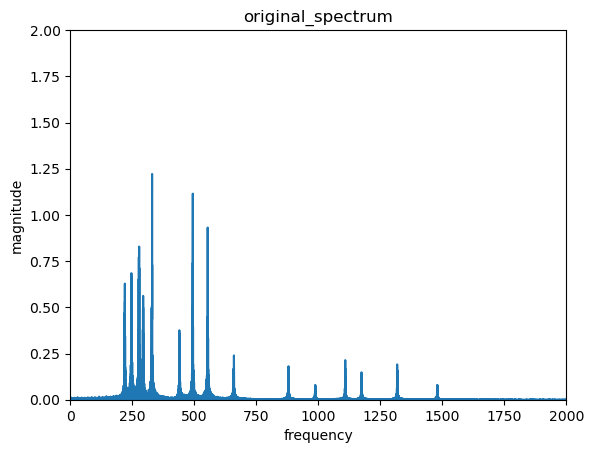

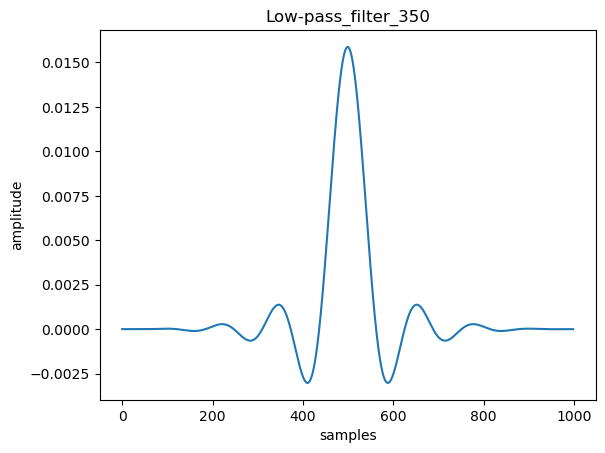

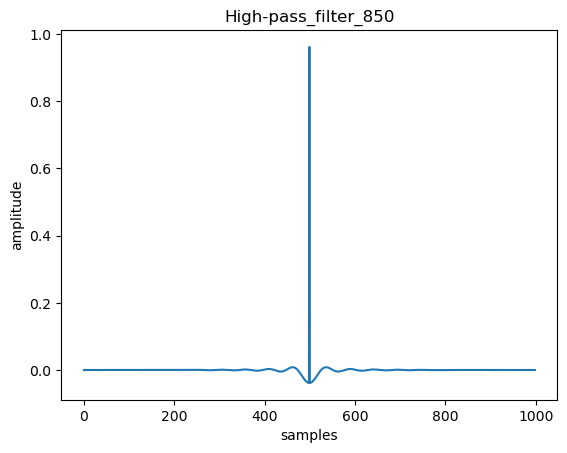

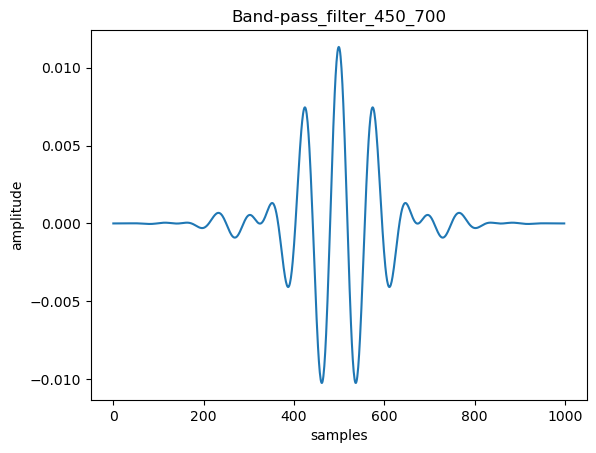

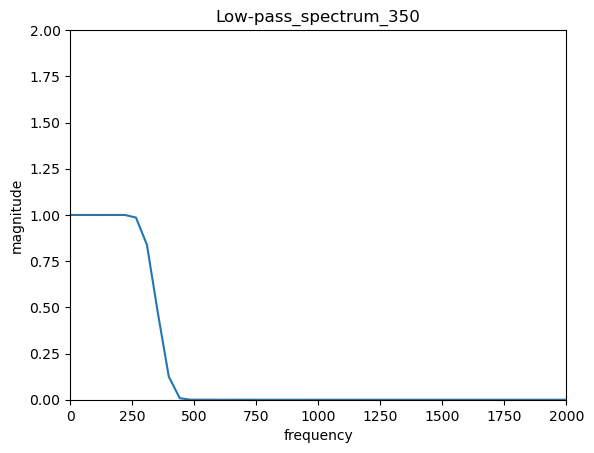

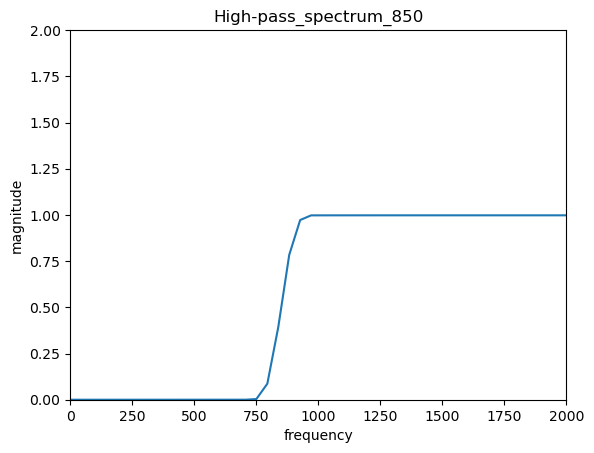

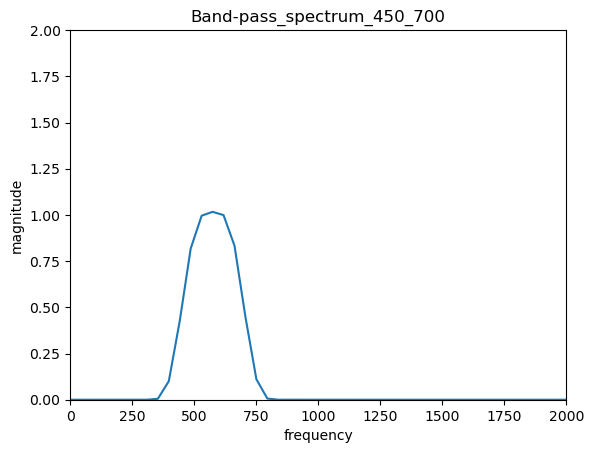

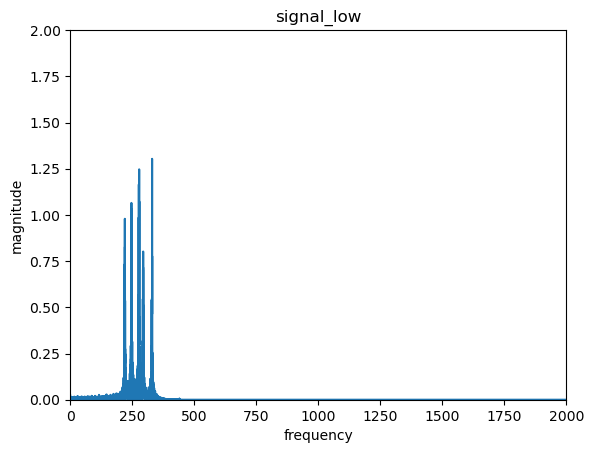

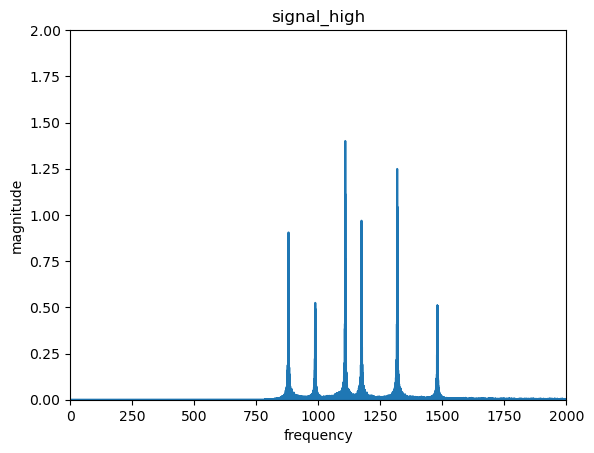

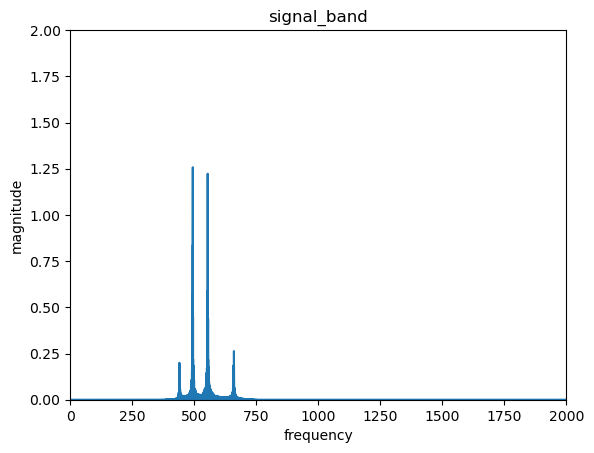

In [8]:
def main():
    audio = "./src/HW2_Mix.wav"
    fs, input_signal = wav.read(audio)

    # 1. Plot the magnitude spectrum of the input signal
    plot_spectrum(input_signal, fs, [0, 2000], [0, 2], "original_spectrum")

    # 2. implement filter
    #TODO: determine the cutoff frequency and window size
    windowType = "Blackman"
    fc_low = 350
    fc_high = 850
    fc_band = np.array([450, 700])
    filterSize = 999 # filter size should be an odd number

    # create filters
    lowpassFilter = filter(fs, N=filterSize, windowType=windowType, filterType='Low-pass', fc=fc_low)
    highpassFilter = filter(fs, N=filterSize, windowType=windowType, filterType='High-pass', fc=fc_high)
    bandpassFilter = filter(fs, N=filterSize, windowType=windowType, filterType='Band-pass', fc=fc_band)

    # plot filter shape and spectrum
    plot_filter(lowpassFilter, f"Low-pass_filter_{fc_low}")
    plot_filter(highpassFilter, f"High-pass_filter_{fc_high}")
    plot_filter(bandpassFilter , f"Band-pass_filter_{fc_band[0]}_{fc_band[1]}")
    plot_spectrum(lowpassFilter, fs, [0, 2000], [0, 2], f"Low-pass_spectrum_{fc_low}")
    plot_spectrum(highpassFilter, fs, [0, 2000], [0, 2], f"High-pass_spectrum_{fc_high}")
    plot_spectrum(bandpassFilter, fs, [0, 2000], [0, 2], f"Band-pass_spectrum_{fc_band[0]}_{fc_band[1]}")
    
    # 3. Convolve the input signal with the filters
    signal_low = convolve(input_signal, lowpassFilter, N=filterSize)
    signal_high = convolve(input_signal, highpassFilter, N=filterSize)
    signal_band = convolve(input_signal, bandpassFilter, N=filterSize)

    # save audio
    wav.write(f"output/Low_pass_{fc_low}.wav", fs, signal_low)
    wav.write(f"output/High_pass_{fc_high}.wav", fs, signal_high)
    wav.write(f"output/Band_pass_{fc_band[0]}_{fc_band[1]}.wav", fs, signal_band)

    # plot output spectrum
    plot_spectrum(signal_low, fs, [0,2000], [0,2], "signal_low")
    plot_spectrum(signal_high, fs, [0,2000], [0,2], "signal_high")
    plot_spectrum(signal_band, fs, [0,2000], [0,2], "signal_band")

    # 4. Reduce sample rate
    new_fs = 2000
    signal_low_ds = down_sampling(signal_low, fs, new_fs)
    signal_high_ds = down_sampling(signal_high, fs, new_fs)
    signal_band_ds = down_sampling(signal_band, fs, new_fs)

    # You can also try setting 'new_fs' as 'fs' to see what happens.
    wav.write(f"output/Low_pass_{fc_low}_2khz.wav", new_fs, signal_low_ds) 
    wav.write(f"output/High_pass_{fc_high}_2khz.wav", new_fs, signal_high_ds) 
    wav.write(f"output/Band_pass_{fc_band[0]}_{fc_band[1]}_2khz.wav", new_fs, signal_band_ds) 

    # 5. Echo
    echo_one , echo_multiple = echo(signal_low, 1, 0.5, fs)
    wav.write('output/echo_one.wav', fs, echo_one)
    wav.write("output/echo_multiple.wav", fs, echo_multiple)

if __name__ == "__main__":
    main()


## 6. Report (20%)
Your report should cover the following aspects(each 5%):
- Describe how you implemented the filter and convolutions to separate the mixed song. And how did you determine the filter size and cut-off frequency?
- Compare the spectrum and shape of the filters.
- Compare the differences between the signals before and after reducing the sampling rates.
- How did you implement one/multiple fold echo?

1. Describe how you implemented the filter and convolutions to separate the mixed song. And how did you determine the filter size and cut-off frequency?

    filter的實作主要參考了講義的FIR Fiter Design - Algorithm這一頁，並且不同的filter所使用的公式則是參照Ideal Filter這一頁，而convolution的實作則是參照FIR Filter裡所給出的公式，但是原本按照講義所寫的版本，跑完三個音檔需要將近10分鐘的時間，所以我有使用gpt幫助我優化code，使其執行時間降低到10秒內可以完成。

    filter size主要參考了Hw2 spec中low pass filter的繪圖，發現spec中所給出的圖，filter size約在900～1000，並因為講義內有提到filter size假設會是odd，所以我取999這個數字。而cut-off frequency的選取首先我參照orignal spectrum的圖，大於找frequency集中位置的一半作為low和high的分界點，大概是400以下為low，以上為high，然後發現low其實已經不錯，但仍有一點點雜音，所以low取350，而high則是包含很多中低頻雜音，所以我一次50的加上去，最終加到850左右是一個比較適合的頻率。最後的band則是取350到850之間，但同樣有包含低高頻的雜音，同樣50加50減，最終取450到700是比較適合的。

2. Compare the spectrum and shape of the filters.

    從三者的spectrum可以看出，在cut-off frequency的地方所呈現的並不是一個垂直線，而是一條斜線，這代表其實cut-off frequency附近的頻率也仍是有保留下來，也就是講義中所提到的transition band的區域，而這個現象可以從後面經過convolution後的signal specturm可以看出，cut-off附近也仍有保留很少的頻率，並不是完全變成0。

    三者的形狀分別是sin函數與window function結合的產物，low pass內因為window function的應用會使其稍微平滑和截斷，high pass則是將sin取負並且在中間位置產生一個很大的峰值，而band pass則是結合low和high的兩個sin函數，使得形狀上出現除中間以外的兩個峰值，這允許訊號在兩個峰值內通過。

3. Compare the differences between the signals before and after reducing the sampling rates.
    
    在down sample到2000後，low和band的結果其實聽不太出來差別，而high則是有很明顯有很多音不見並且會有不連續的現象。根據Nyquist theorm，sample rate要大於最高頻率的2倍，此處因為sample rate降低到2000，意即2000/2=1000以上的頻率會產生失真，所以導致此現象的發生。

4. How did you implement one/multiple fold echo

    實作主要參考講義中Comb fiter那一頁，在理解過後，便可以將講義中所給出的例子3200和0.8對應到delay(D)和attenuation factor(alpha)，隨後根據公式，在n小於delay前，都取原本的signal，而大於等於delay時，便加入echo。


